In [ ]:
# Small Neural Network training
# Using dataset from keras - Digits Classification Dataset. 
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#digit = keras.datasets.mnist.load_data(path="mnist.npz")

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
digit_names = [0,1,2,3,4,5,6,7,8,9]

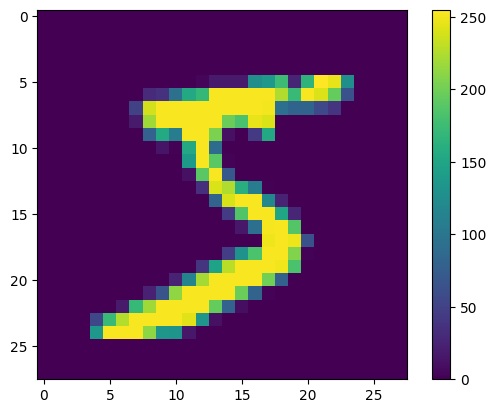

In [9]:
plt.figure()

plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

plt.show()

In [10]:
train_images = x_train / 255.0
test_images = x_test / 255.0

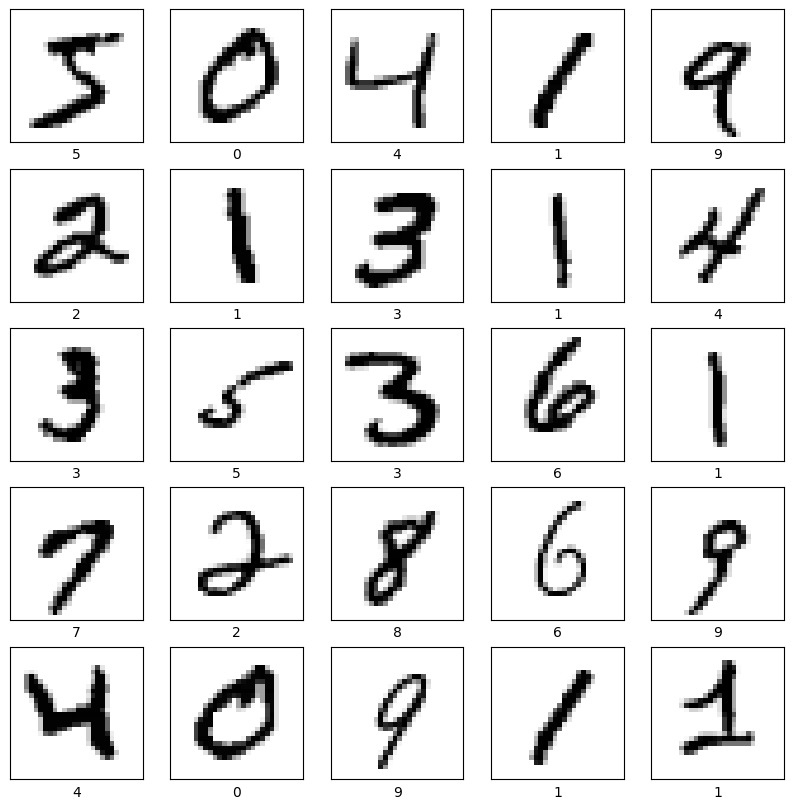

In [11]:
plt.figure(figsize=(10, 10))

for i in range(25):

    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])

    plt.grid(False)

    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(digit_names[y_train[i]])

plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\mvale\Documents\_env1\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9174 - loss: 0.3969
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9343 - loss: 0.2692
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9443 - loss: 0.2183
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9506 - loss: 0.2044
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9517 - loss: 0.1962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9526 - loss: 0.1943
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9562 - loss: 0.1800
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9581 - loss: 0.1742
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9600 - loss: 0.1625
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9606 - loss: 0.1607


In [19]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
predictions[0]

array([2.7254871e-18, 9.2870553e-27, 7.4368778e-09, 6.4140072e-06,
       4.8172728e-26, 6.3473963e-19, 0.0000000e+00, 9.9999356e-01,
       6.7605612e-33, 7.5594930e-10], dtype=float32)

In [21]:
np.argmax(predictions[0])

7

In [22]:
y_test[0]

7

In [23]:
def plot_images(i, predictions_array, true_image, img):

    predictions_array, true_image, img = predictions_array, true_image[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_image:
        color = 'blue'

    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(digit_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        digit_names[true_image],
                                        color=color))

In [35]:
def plot_value_array(i, predictions_array, true_image):

    predictions_array, true_image = predictions_array, true_image[i]

    plt.grid(False)

    plt.xticks(range(10))
    plt.yticks([])

    plot = plt.bar(range(10), predictions_array, color='#777777')

    plt.ylim([0,1])
    predicted_image = np.argmax(predictions_array)

    plot[predicted_image].set_color('r')
    plot[true_image].set_color('b')

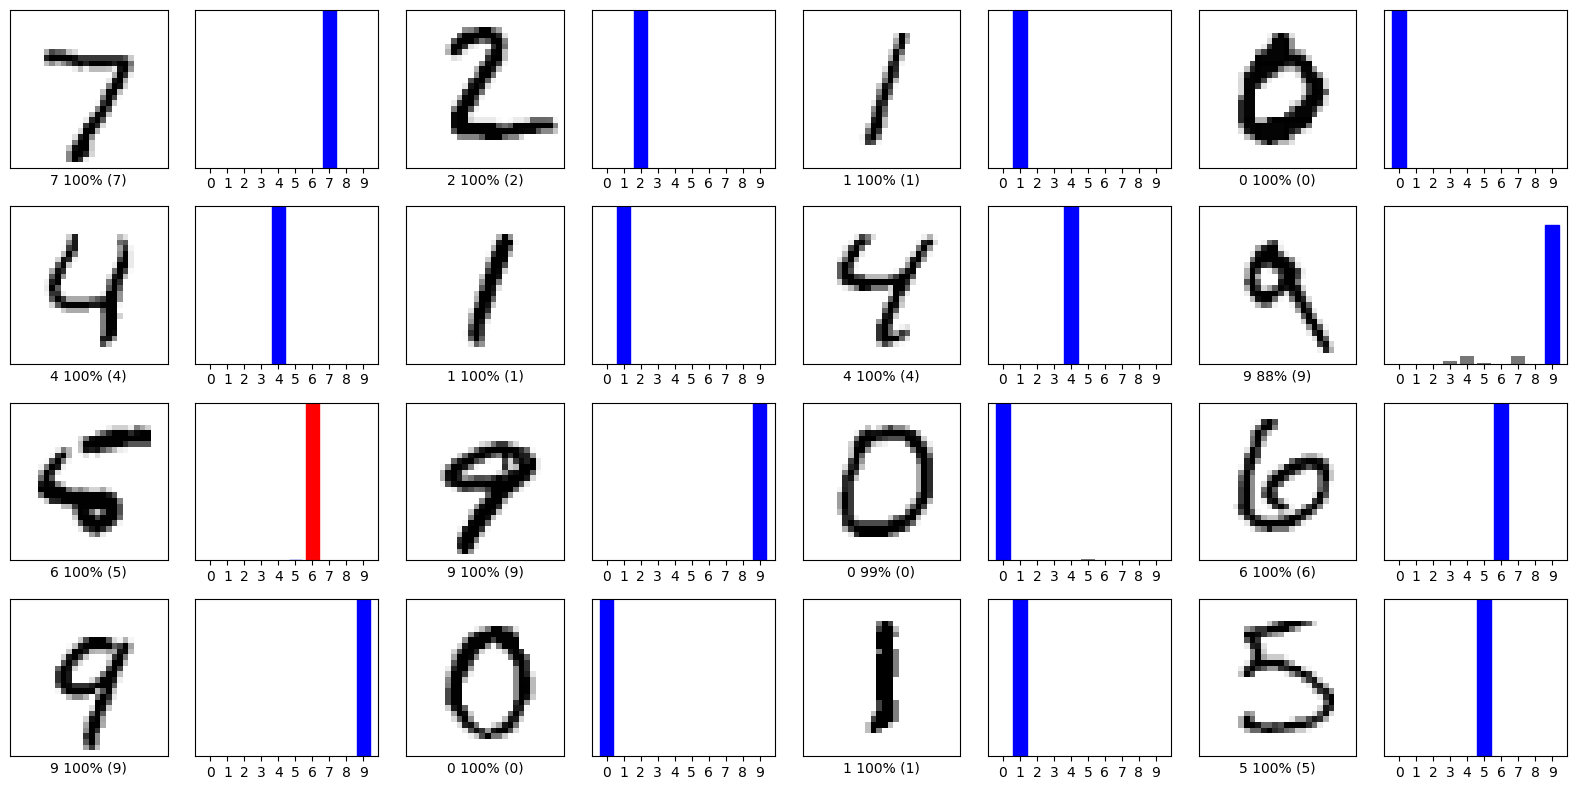

In [36]:
rows = 4
cols = 4

num_images = rows * cols

plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):

    plt.subplot(rows, 2*cols, 2*i+1)
    plot_images(i, predictions[i], y_test, x_test)

    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)

plt.tight_layout()
plt.show()